#  Boundary Layer T and S Line Plots

Over final year for Ocean1-COM experiment

In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cftime
import cmocean as cm

from netCDF4 import Dataset
import os.path
import matplotlib.colors as colors

Models: 
```
COCO   MITgcm-BAS          MITgcm-JPL  MOM6_SIGMA_ZSTAR  NEMO-CNRS      POP2x
FVCOM  MITgcm_BAS_Coupled  MOM6        MPAS-Ocean        NEMO-UKESM1is  ROMS-UTAS
```

In [2]:
## folder where the isomip-plus github repo is located
baserepo = '/g/data/x77/cy8964/isomip-plus/'
## folder where you downloaded the zipped Google Drive data
basedrive = '/g/data/x77/cy8964/ISOMIP+Data-new/'

# load the data from the text files, which point to the right location of the file in the drive structure
Ocean0_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean0_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)


## Define where we are taking the vertical profiles

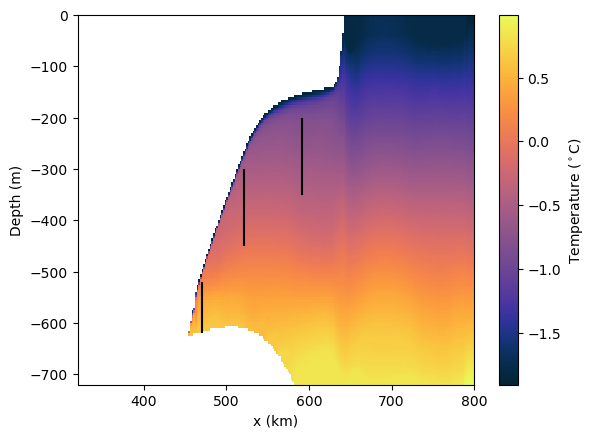

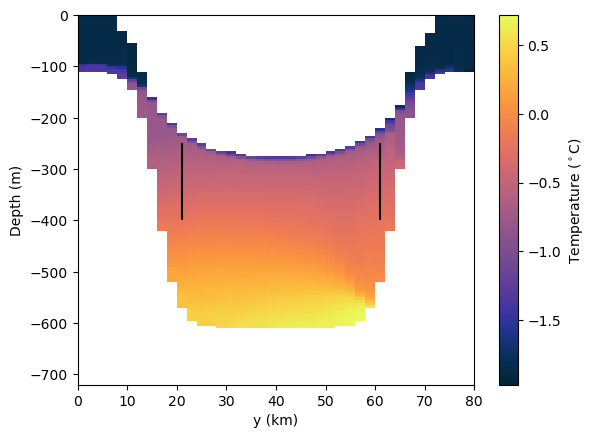

Text(0.5, 0, 'x (km)')

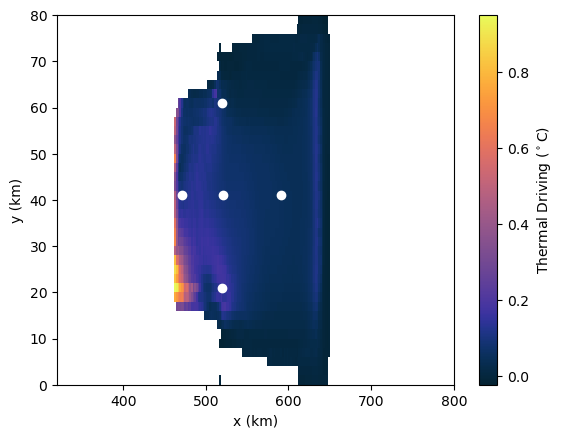

In [12]:
Test_DS = xr.open_dataset(basedrive+Ocean1_COM[6], decode_times=False)
Test_DS = Test_DS.set_coords(['x', 'y', 'z', 'time'])
nTime = Test_DS.sizes['nTime']
T_XZ = Test_DS.temperatureXZ.isel(nTime=slice(nTime-12, nTime)).mean('nTime')



mesh = plt.pcolormesh(
        1e-3 * Test_DS.x.values, Test_DS.z.values, T_XZ.where(T_XZ<1e35).values, 
        cmap=cm.cm.thermal)
plt.colorbar(label = 'Temperature ($^\circ$C)')
#T_XZ.where(T_XZ<1e36).plot(yincrease = False, cmap = cm.cm.thermal)
plt.vlines(1e-3 * Test_DS.x.values[75],-620,-520,color = 'k')
plt.vlines(1e-3 * Test_DS.x.values[100],-450,-300,color = 'k')
plt.vlines(1e-3 * Test_DS.x.values[135],-350,-200,color = 'k')
plt.xlabel('x (km)')
plt.ylabel('Depth (m)')
plt.show()

T_YZ = Test_DS.temperatureYZ.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
mesh = plt.pcolormesh(
        1e-3 * Test_DS.y.values, Test_DS.z.values, T_YZ.where(T_YZ<1e35).values, 
        cmap=cm.cm.thermal)
plt.colorbar(label = 'Temperature ($^\circ$C)')
plt.vlines([1e-3 * Test_DS.y.values[10],1e-3 * Test_DS.y.values[30]],-400,-250,color = 'k')
plt.xlabel('y (km)')
plt.ylabel('Depth (m)')
plt.show()

TD_XY = Test_DS.thermalDriving.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
mesh = plt.pcolormesh(
        1e-3 * Test_DS.x.values, 1e-3 *Test_DS.y.values, TD_XY.where(TD_XY<1e35).values, 
        cmap=cm.cm.thermal)
plt.colorbar(label = 'Thermal Driving ($^\circ$C)')
plt.scatter([1e-3 * Test_DS.x.values[75],1e-3 * Test_DS.x.values[100],1e-3 * Test_DS.x.values[135]],
            [1e-3 * Test_DS.y.values[20],1e-3 * Test_DS.y.values[20],1e-3 * Test_DS.y.values[20]],color = 'w')
plt.scatter([1e-3 * Test_DS.x.values[99]+1,1e-3 * Test_DS.x.values[99]+1],
            [1e-3 * Test_DS.y.values[10],1e-3 * Test_DS.y.values[30]],color = 'w')
plt.ylabel('y (km)')
plt.xlabel('x (km)')


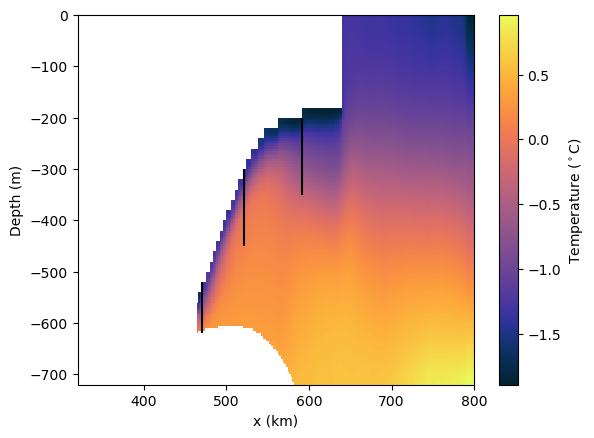

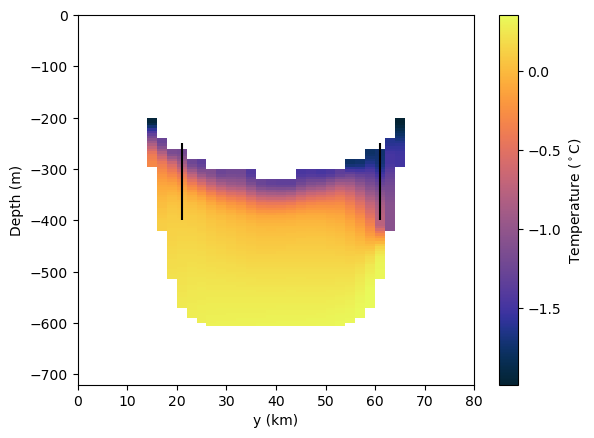

Text(0.5, 0, 'x (km)')

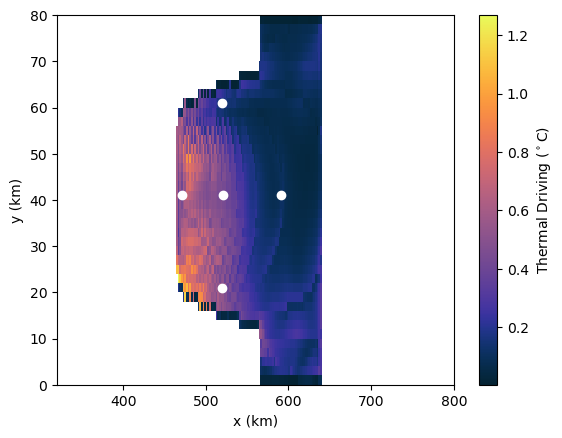

In [13]:
Test_DS = xr.open_dataset(basedrive+Ocean1_COM[0], decode_times=False)
Test_DS = Test_DS.set_coords(['x', 'y', 'z', 'time'])
nTime = Test_DS.sizes['nTime']
T_XZ = Test_DS.temperatureXZ.isel(nTime=slice(nTime-12, nTime)).mean('nTime')



mesh = plt.pcolormesh(
        1e-3 * Test_DS.x.values, Test_DS.z.values, T_XZ.where(T_XZ<1e35).values, 
        cmap=cm.cm.thermal)
plt.colorbar(label = 'Temperature ($^\circ$C)')
#T_XZ.where(T_XZ<1e36).plot(yincrease = False, cmap = cm.cm.thermal)
plt.vlines(1e-3 * Test_DS.x.values[75],-620,-520,color = 'k')
plt.vlines(1e-3 * Test_DS.x.values[100],-450,-300,color = 'k')
plt.vlines(1e-3 * Test_DS.x.values[135],-350,-200,color = 'k')
plt.xlabel('x (km)')
plt.ylabel('Depth (m)')
plt.show()

T_YZ = Test_DS.temperatureYZ.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
mesh = plt.pcolormesh(
        1e-3 * Test_DS.y.values, Test_DS.z.values, T_YZ.where(T_YZ<1e35).values, 
        cmap=cm.cm.thermal)
plt.colorbar(label = 'Temperature ($^\circ$C)')
plt.vlines([1e-3 * Test_DS.y.values[10],1e-3 * Test_DS.y.values[30]],-400,-250,color = 'k')
plt.xlabel('y (km)')
plt.ylabel('Depth (m)')
plt.show()

TD_XY = Test_DS.thermalDriving.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
mesh = plt.pcolormesh(
        1e-3 * Test_DS.x.values, 1e-3 *Test_DS.y.values, TD_XY.where(TD_XY<1e35).values, 
        cmap=cm.cm.thermal)
plt.colorbar(label = 'Thermal Driving ($^\circ$C)')
plt.scatter([1e-3 * Test_DS.x.values[75],1e-3 * Test_DS.x.values[100],1e-3 * Test_DS.x.values[135]],
            [1e-3 * Test_DS.y.values[20],1e-3 * Test_DS.y.values[20],1e-3 * Test_DS.y.values[20]],color = 'w')
plt.scatter([1e-3 * Test_DS.x.values[99]+1,1e-3 * Test_DS.x.values[99]+1],
            [1e-3 * Test_DS.y.values[10],1e-3 * Test_DS.y.values[30]],color = 'w')
plt.ylabel('y (km)')
plt.xlabel('x (km)')


In [4]:
#indices x = 99 and 100 bound x = 520km, where YZ transect taken
print(Test_DS.x.values[99])
print(Test_DS.x.values[100])


519000.0
521000.0


In [5]:
#12 model colours for 12 models, generated using https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=12
modelcolours=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

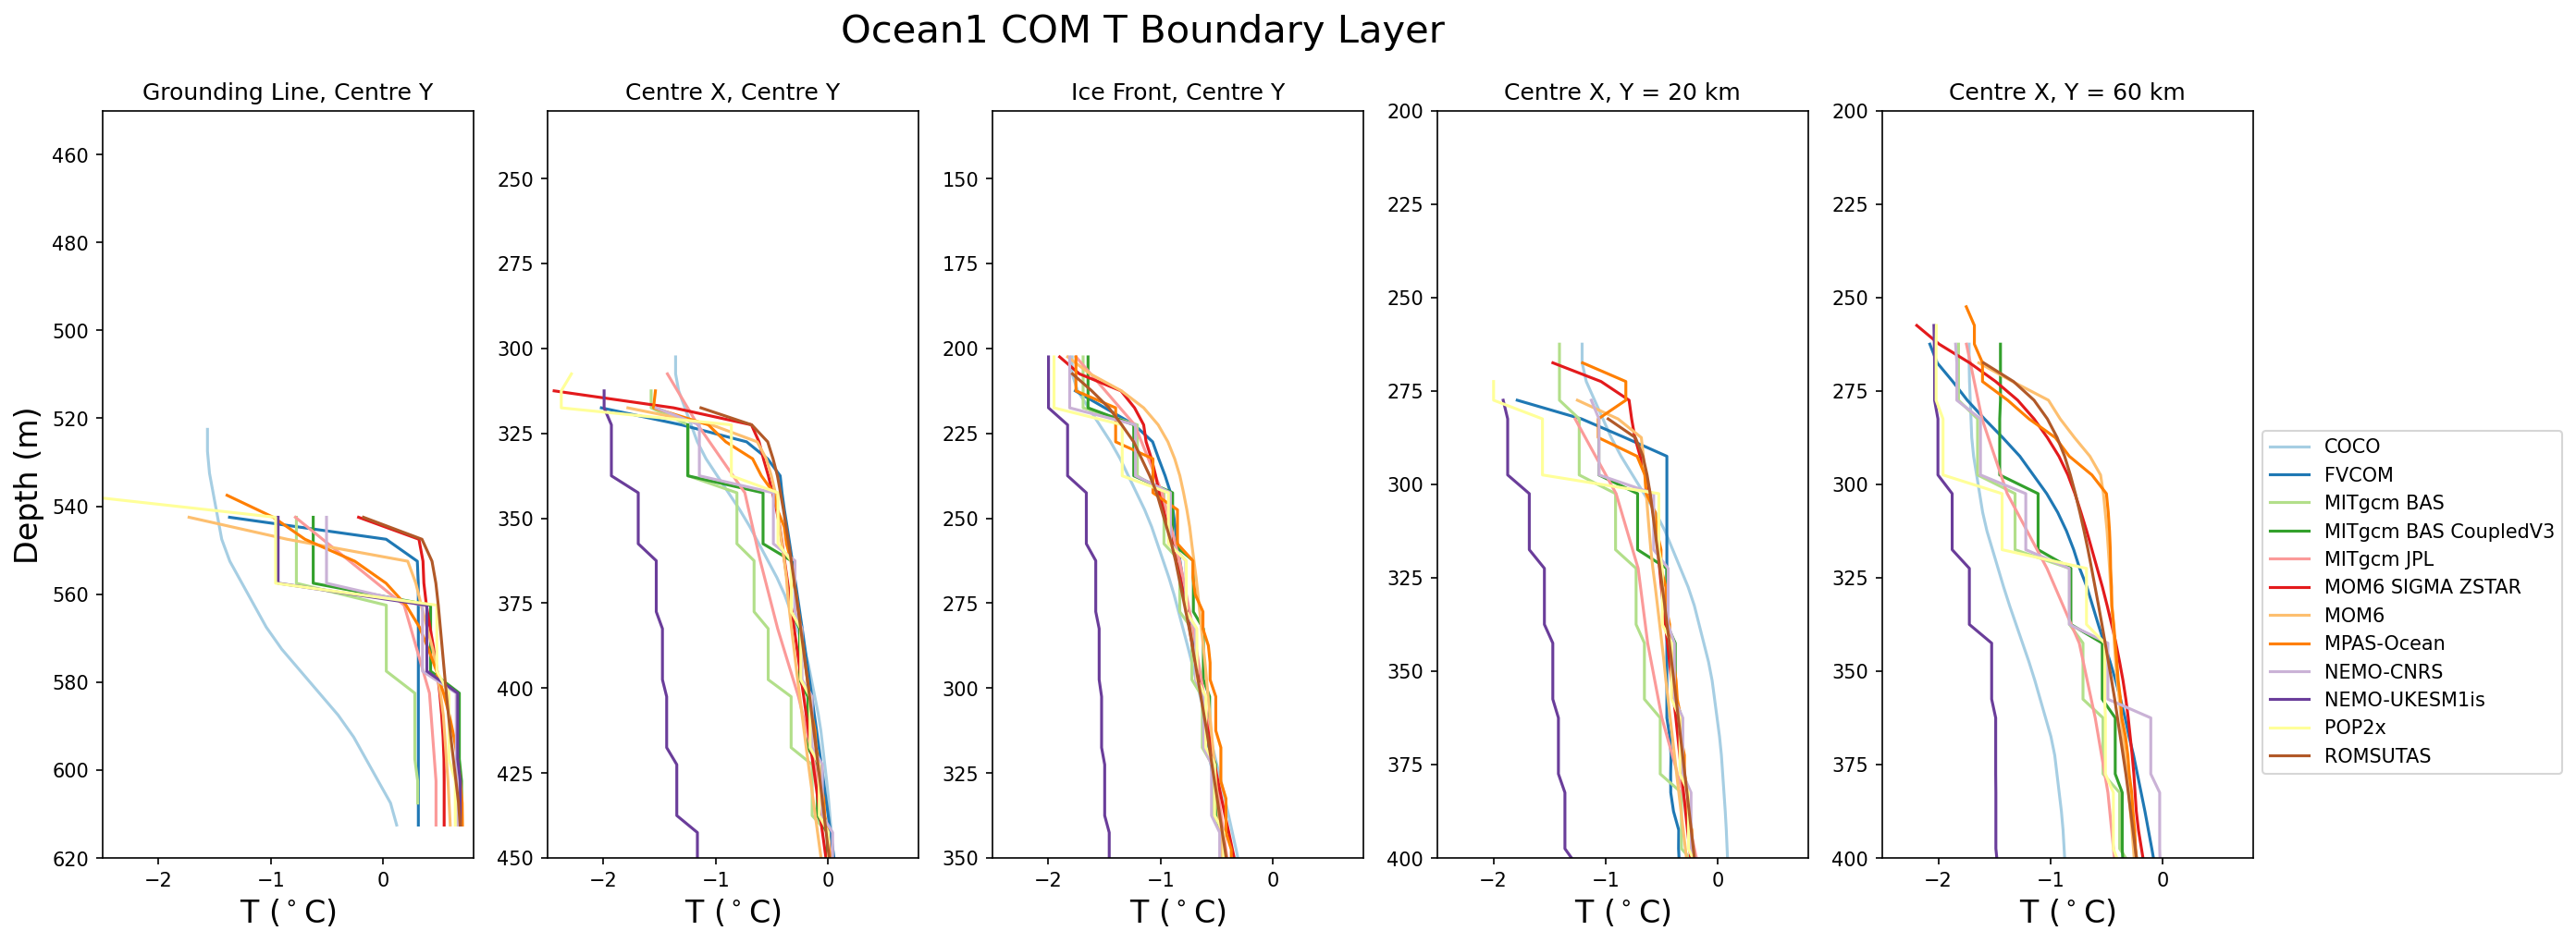

In [15]:
expt = Ocean0_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
length = len(expt)
fig,axes = plt.subplots(ncols = 5, figsize=(20, 7),facecolor='w',dpi = 150)


for i in np.arange(length):
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time', 'z'])
    nTime = ds.sizes['nTime']
    T_XZ = ds.temperatureXZ.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # T_XZ < 1e36 is to get rid of fill values.
    T_XZ = T_XZ.where(T_XZ < 1e35)
    axes[0].plot(
        T_XZ.isel(nx = 75), - ds.z.values,
        label = labels[i], color = modelcolours[i])
    axes[1].plot(
        T_XZ.isel(nx = 100), - ds.z.values,
        label = labels[i], color = modelcolours[i])
    axes[2].plot(
        T_XZ.isel(nx = 135), - ds.z.values,
        label = labels[i], color = modelcolours[i])
    T_YZ = ds.temperatureYZ.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # T_YZ < 1e36 is to get rid of fill values.
    T_YZ = T_YZ.where(T_YZ < 1e36)
    axes[3].plot(
        T_YZ.isel(ny = 10), - ds.z.values,
        label = labels[i], color = modelcolours[i])
    axes[4].plot(
        T_YZ.isel(ny = 30), - ds.z.values,
        label = labels[i], color = modelcolours[i])

axes[0].set_ylabel('Depth (m)', fontsize = 16)
axes[0].set_xlabel('T ($^\circ$C)', fontsize = 16)
axes[1].set_xlabel('T ($^\circ$C)', fontsize = 16)
axes[2].set_xlabel('T ($^\circ$C)', fontsize = 16)
axes[3].set_xlabel('T ($^\circ$C)', fontsize = 16)
axes[4].set_xlabel('T ($^\circ$C)', fontsize = 16)

axes[0].set_title('Grounding Line, Centre Y')
axes[1].set_title('Centre X, Centre Y')
axes[2].set_title('Ice Front, Centre Y')
axes[3].set_title('Centre X, Y = 20 km')
axes[4].set_title('Centre X, Y = 60 km')

xlim = [-2.5, 0.8]
axes[0].set_xlim(xlim)
axes[1].set_xlim(xlim)
axes[2].set_xlim(xlim)
axes[3].set_xlim(xlim)
axes[4].set_xlim(xlim)

# axes[0].set_ylim(620,520)
# axes[1].set_ylim(450,300)
# axes[2].set_ylim(350,200)
# axes[3].set_ylim(400,250)
# axes[4].set_ylim(400,250)
axes[0].set_ylim(620,450)
axes[1].set_ylim(450,230)
axes[2].set_ylim(350,130)
axes[3].set_ylim(400,200)
axes[4].set_ylim(400,200)


axes[4].legend(loc  = 'lower left', bbox_to_anchor = (1,0.1))

fig.subplots_adjust(wspace = 0.2, hspace = 0.35)

fig.suptitle('Ocean1 COM T Boundary Layer', fontsize=20);

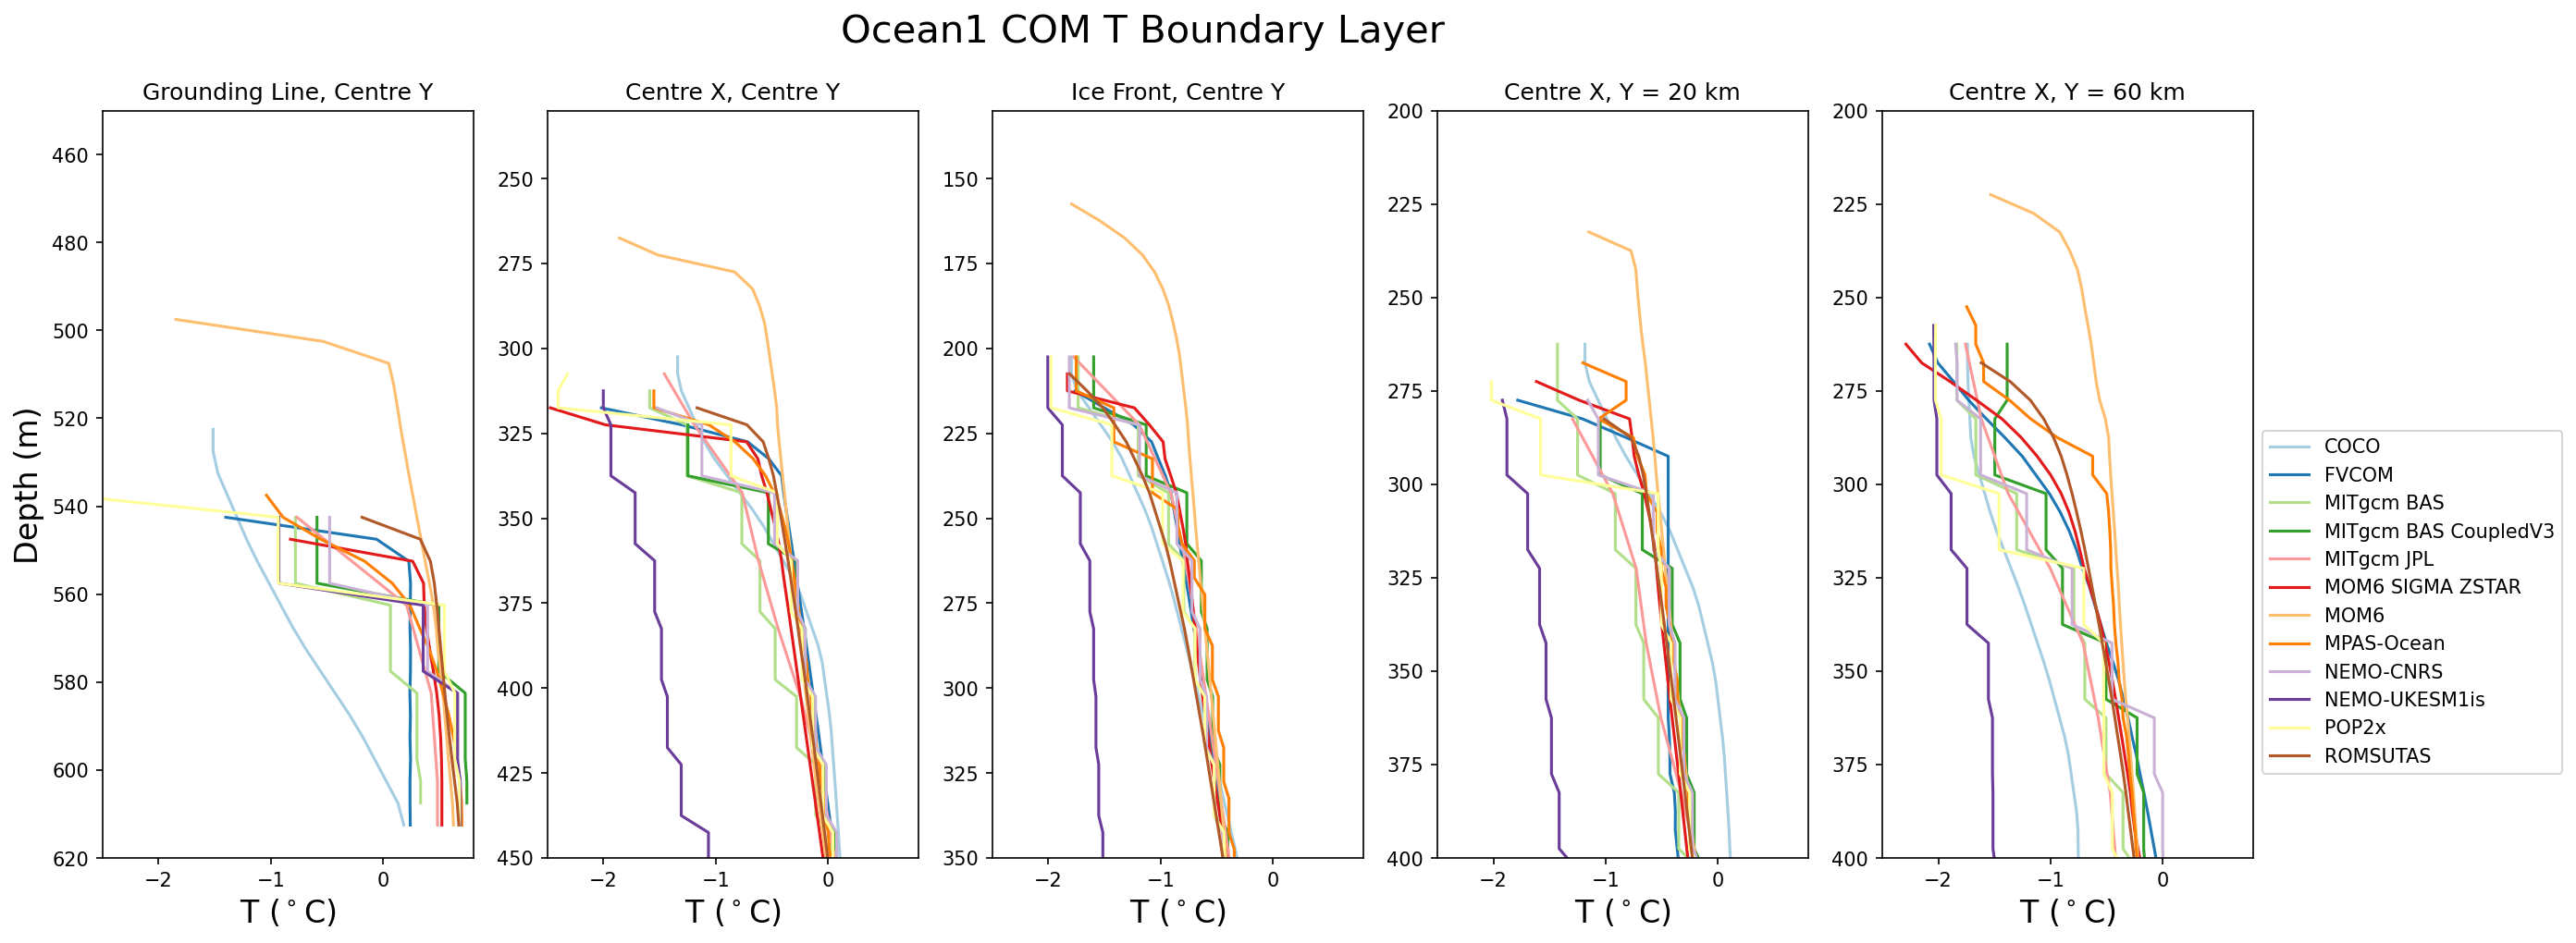

In [17]:
expt = Ocean1_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
length = len(expt)
fig,axes = plt.subplots(ncols = 5, figsize=(20, 7),facecolor='w',dpi = 150)


for i in np.arange(length):
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time', 'z'])
    nTime = ds.sizes['nTime']
    T_XZ = ds.temperatureXZ.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # T_XZ < 1e36 is to get rid of fill values.
    T_XZ = T_XZ.where(T_XZ < 1e35)
    axes[0].plot(
        T_XZ.isel(nx = 75), - ds.z.values,
        label = labels[i], color = modelcolours[i])
    axes[1].plot(
        T_XZ.isel(nx = 100), - ds.z.values,
        label = labels[i], color = modelcolours[i])
    axes[2].plot(
        T_XZ.isel(nx = 135), - ds.z.values,
        label = labels[i], color = modelcolours[i])
    T_YZ = ds.temperatureYZ.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # T_YZ < 1e36 is to get rid of fill values.
    T_YZ = T_YZ.where(T_YZ < 1e35)
    axes[3].plot(
        T_YZ.isel(ny = 10), - ds.z.values,
        label = labels[i], color = modelcolours[i])
    axes[4].plot(
        T_YZ.isel(ny = 30), - ds.z.values,
        label = labels[i], color = modelcolours[i])

axes[0].set_ylabel('Depth (m)', fontsize = 16)
axes[0].set_xlabel('T ($^\circ$C)', fontsize = 16)
axes[1].set_xlabel('T ($^\circ$C)', fontsize = 16)
axes[2].set_xlabel('T ($^\circ$C)', fontsize = 16)
axes[3].set_xlabel('T ($^\circ$C)', fontsize = 16)
axes[4].set_xlabel('T ($^\circ$C)', fontsize = 16)

axes[0].set_title('Grounding Line, Centre Y')
axes[1].set_title('Centre X, Centre Y')
axes[2].set_title('Ice Front, Centre Y')
axes[3].set_title('Centre X, Y = 20 km')
axes[4].set_title('Centre X, Y = 60 km')

xlim = [-2.5, 0.8]
axes[0].set_xlim(xlim)
axes[1].set_xlim(xlim)
axes[2].set_xlim(xlim)
axes[3].set_xlim(xlim)
axes[4].set_xlim(xlim)

# axes[0].set_ylim(620,520)
# axes[1].set_ylim(450,300)
# axes[2].set_ylim(350,200)
# axes[3].set_ylim(400,250)
# axes[4].set_ylim(400,250)
axes[0].set_ylim(620,450)
axes[1].set_ylim(450,230)
axes[2].set_ylim(350,130)
axes[3].set_ylim(400,200)
axes[4].set_ylim(400,200)


axes[4].legend(loc  = 'lower left', bbox_to_anchor = (1,0.1))

fig.subplots_adjust(wspace = 0.2, hspace = 0.35)

fig.suptitle('Ocean1 COM T Boundary Layer', fontsize=20);

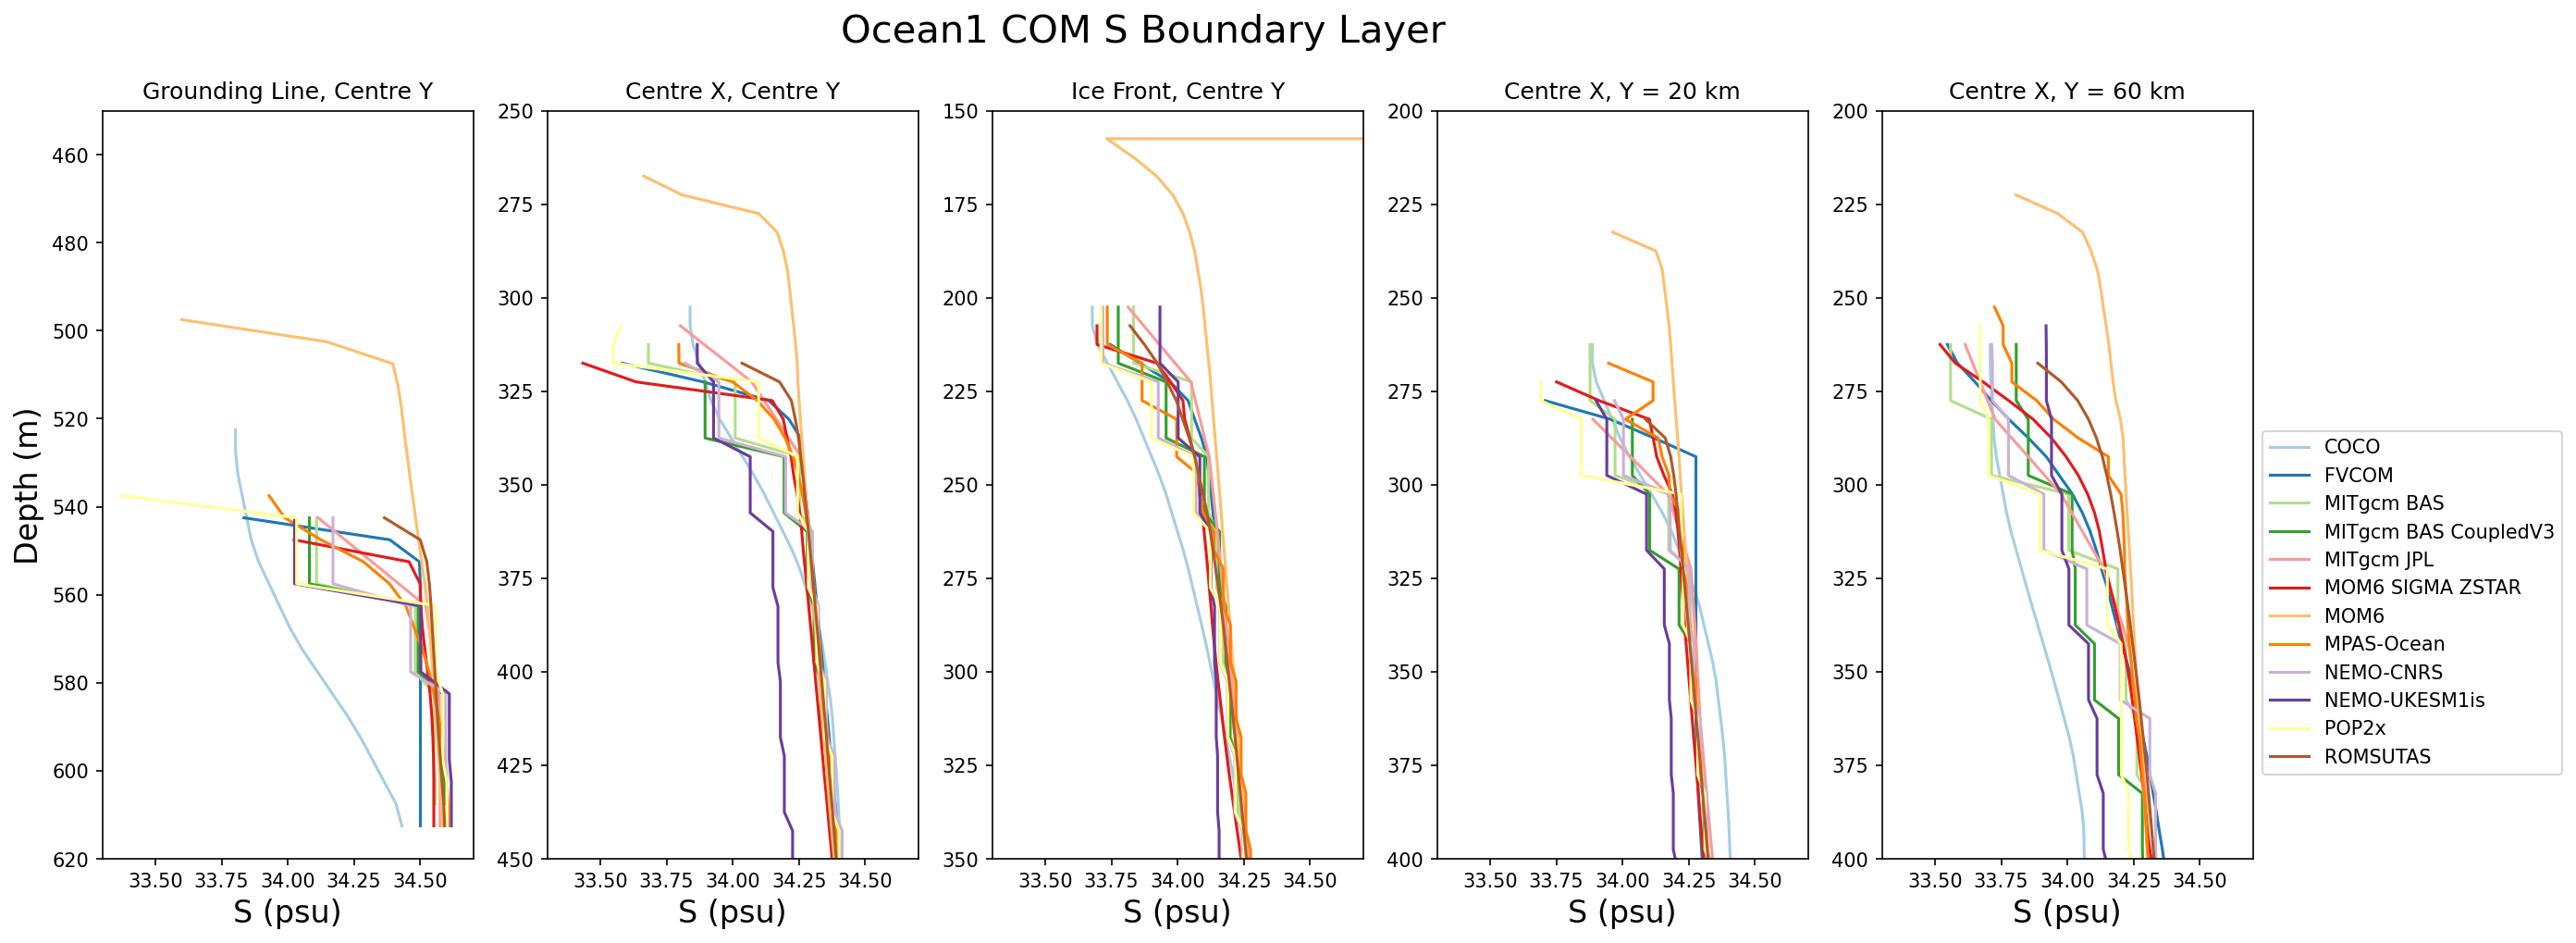

In [8]:
expt = Ocean1_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
length = len(expt)
fig,axes = plt.subplots(ncols = 5, figsize=(20, 7),facecolor='w',dpi = 150)


for i in np.arange(length):
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time', 'z'])
    nTime = ds.sizes['nTime']
    S_XZ = ds.salinityXZ.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # S_XZ < 1e36 is to get rid of fill values.
    S_XZ = S_XZ.where(S_XZ < 1e36)
    axes[0].plot(
        S_XZ.isel(nx = 75), - ds.z.values,
        label = labels[i], color = modelcolours[i])
    axes[1].plot(
        S_XZ.isel(nx = 100), - ds.z.values,
        label = labels[i], color = modelcolours[i])
    axes[2].plot(
        S_XZ.isel(nx = 135), - ds.z.values,
        label = labels[i], color = modelcolours[i])
    S_YZ = ds.salinityYZ.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # S_YZ < 1e36 is to get rid of fill values.
    S_YZ = S_YZ.where(S_YZ < 1e36)
    axes[3].plot(
        S_YZ.isel(ny = 10), - ds.z.values,
        label = labels[i], color = modelcolours[i])
    axes[4].plot(
        S_YZ.isel(ny = 30), - ds.z.values,
        label = labels[i], color = modelcolours[i])

axes[0].set_ylabel('Depth (m)', fontsize = 16)
axes[0].set_xlabel('S (psu)', fontsize = 16)
axes[1].set_xlabel('S (psu)', fontsize = 16)
axes[2].set_xlabel('S (psu)', fontsize = 16)
axes[3].set_xlabel('S (psu)', fontsize = 16)
axes[4].set_xlabel('S (psu)', fontsize = 16)

axes[0].set_title('Grounding Line, Centre Y')
axes[1].set_title('Centre X, Centre Y')
axes[2].set_title('Ice Front, Centre Y')
axes[3].set_title('Centre X, Y = 20 km')
axes[4].set_title('Centre X, Y = 60 km')

xlim = [33.3, 34.7]
axes[0].set_xlim(xlim)
axes[1].set_xlim(xlim)
axes[2].set_xlim(xlim)
axes[3].set_xlim(xlim)
axes[4].set_xlim(xlim)

# axes[0].set_ylim(620,520)
# axes[1].set_ylim(450,300)
# axes[2].set_ylim(350,200)
# axes[3].set_ylim(400,250)
# axes[4].set_ylim(400,250)

axes[0].set_ylim(620,450)
axes[1].set_ylim(450,250)
axes[2].set_ylim(350,150)
axes[3].set_ylim(400,200)
axes[4].set_ylim(400,200)


axes[4].legend(loc  = 'lower left', bbox_to_anchor = (1,0.1))

fig.subplots_adjust(wspace = 0.2, hspace = 0.35)

fig.suptitle('Ocean1 COM S Boundary Layer', fontsize=20);

## check if XZ and YZ lines match up 
(since centre of transects should overlap at y=40km, x=520km, which is y=19.5 and x=99.5 in indices)

519000.0
521000.0
39000.0
41000.0
519000.0
521000.0
39000.0
41000.0
519000.0
521000.0
39000.0
41000.0
519000.0
521000.0
39000.0
41000.0
519000.0
521000.0
39000.0
41000.0
519000.0
521000.0
39000.0
41000.0
519000.0
521000.0
39000.0
41000.0
519000.0
521000.0
39000.0
41000.0
519000.0
521000.0
39000.0
41000.0
519000.0
521000.0
39000.0
41000.0
519000.0
521000.0
39000.0
41000.0
519000.0
521000.0
39000.0
41000.0


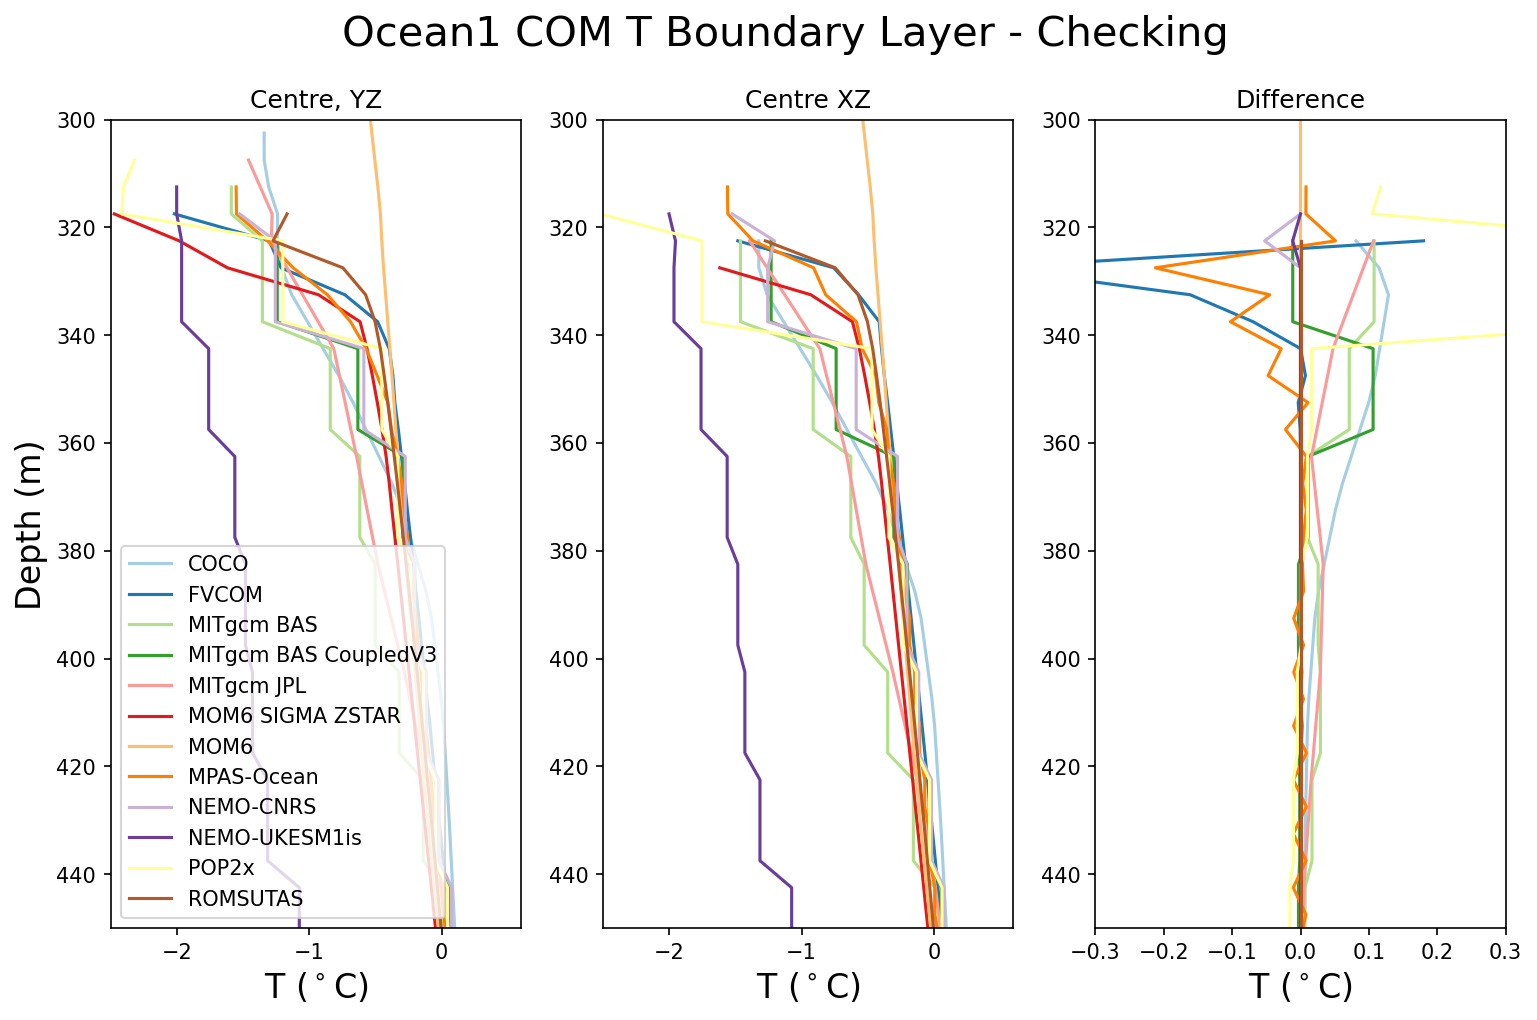

In [8]:
expt = Ocean1_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
length = len(expt)
fig,axes = plt.subplots(ncols = 3, figsize=(12, 7),facecolor='w',dpi = 150)


for i in np.arange(length):
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time', 'z'])
    nTime = ds.sizes['nTime']
    T_XZ = ds.temperatureXZ.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # T_XZ < 1e36 is to get rid of fill values.
    T_XZ = T_XZ.where(T_XZ < 1e36)
    axes[0].plot(
        T_XZ.isel(nx = np.array([99,100])).mean('nx', skipna = True), - ds.z.values,
        label = labels[i], color = modelcolours[i])
    T_YZ = ds.temperatureYZ.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # T_YZ < 1e36 is to get rid of fill values.
    T_YZ = T_YZ.where(T_YZ < 1e36)
    axes[1].plot(
        T_YZ.isel(ny = np.array([19,20])).mean('ny', skipna = True), - ds.z.values,
        label = labels[i], color = modelcolours[i])

    axes[2].plot(
        T_XZ.isel(nx = np.array([99,100])).mean('nx', skipna = True)-
        T_YZ.isel(ny = np.array([19,20])).mean('ny', skipna = True), - ds.z.values,
        label = labels[i], color = modelcolours[i])
    print(T_XZ.x.values[99])
    print(T_XZ.x.values[100])
    print(T_YZ.y.values[19])
    print(T_YZ.y.values[20])

axes[0].set_ylabel('Depth (m)', fontsize = 16)
axes[0].set_xlabel('T ($^\circ$C)', fontsize = 16)
axes[1].set_xlabel('T ($^\circ$C)', fontsize = 16)
axes[2].set_xlabel('T ($^\circ$C)', fontsize = 16)

axes[0].set_title('Centre, YZ')
axes[1].set_title('Centre XZ')
axes[2].set_title('Difference')

xlim = [-2.5, 0.6]
axes[0].set_xlim(xlim)
axes[1].set_xlim(xlim)
axes[2].set_xlim(-0.3,0.3)

axes[0].set_ylim(450,300)
axes[1].set_ylim(450,300)
axes[2].set_ylim(450,300)


axes[0].legend(loc = 'lower left')

fig.subplots_adjust(wspace = 0.2, hspace = 0.35)

fig.suptitle('Ocean1 COM T Boundary Layer - Checking', fontsize=20);

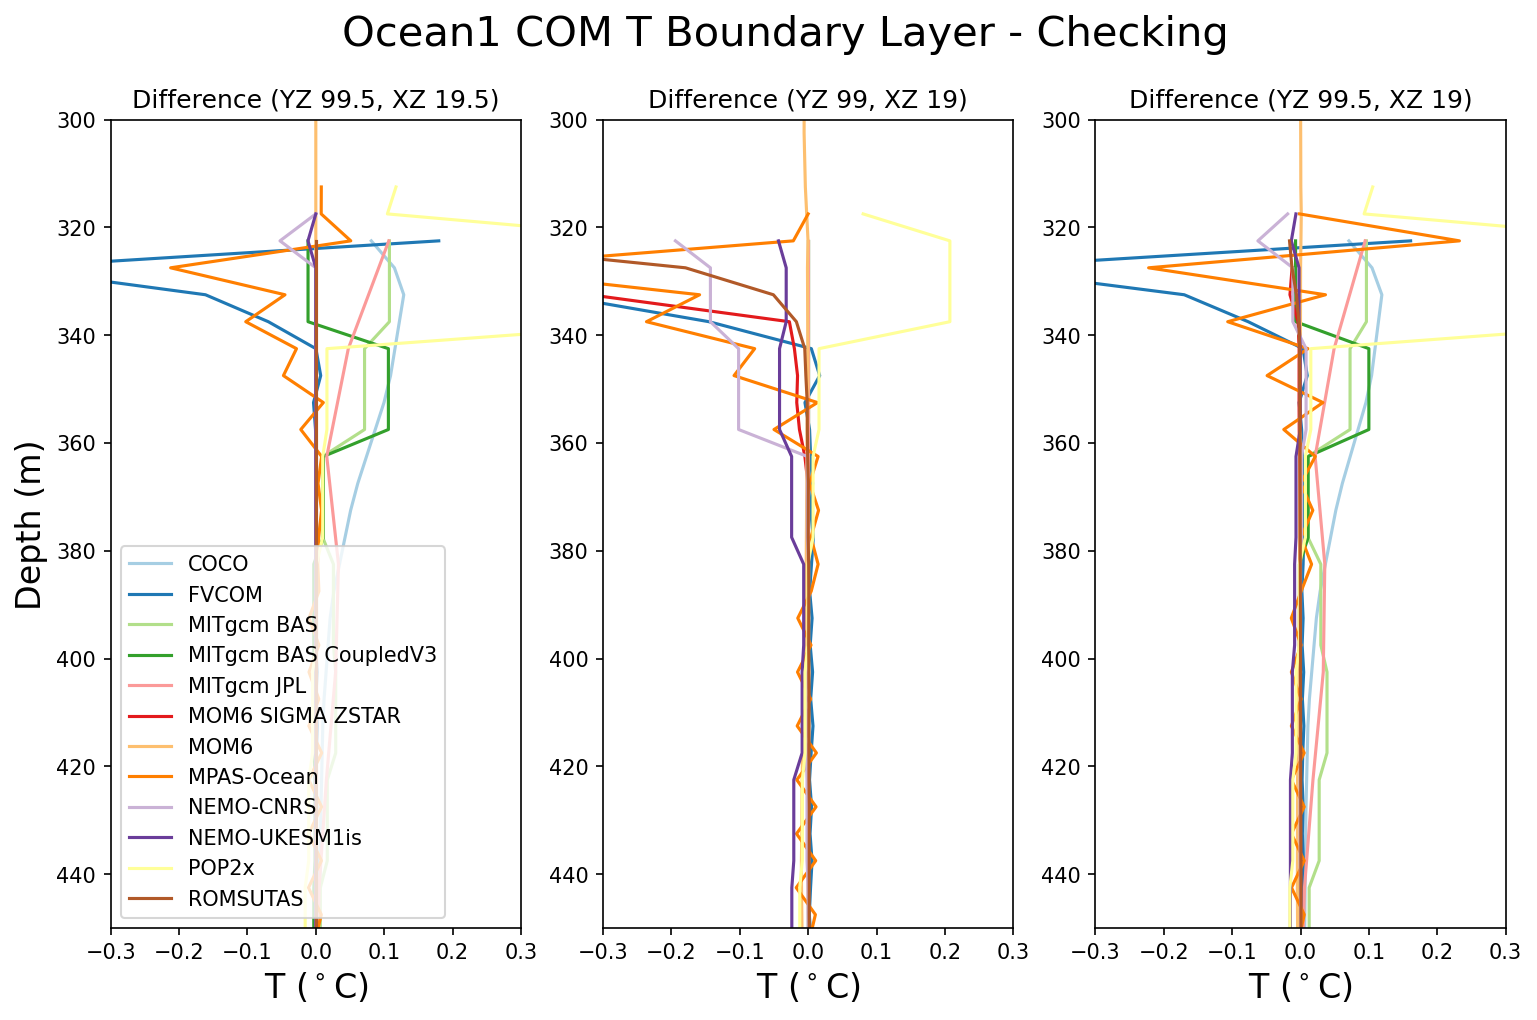

In [9]:
expt = Ocean1_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
length = len(expt)
fig,axes = plt.subplots(ncols = 3, figsize=(12, 7),facecolor='w',dpi = 150)


for i in np.arange(length):
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time', 'z'])
    nTime = ds.sizes['nTime']
    T_XZ = ds.temperatureXZ.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # T_XZ < 1e36 is to get rid of fill values.
    T_XZ = T_XZ.where(T_XZ < 1e36)
    T_YZ = ds.temperatureYZ.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # T_YZ < 1e36 is to get rid of fill values.
    T_YZ = T_YZ.where(T_YZ < 1e36)

    axes[0].plot(
        T_XZ.isel(nx = np.array([99,100])).mean('nx', skipna = True)-
        T_YZ.isel(ny = np.array([19,20])).mean('ny', skipna = True), - ds.z.values,
        label = labels[i], color = modelcolours[i])

    axes[1].plot(
        T_XZ.isel(nx = np.array([99])).mean('nx', skipna = True)-
        T_YZ.isel(ny = np.array([19])).mean('ny', skipna = True), - ds.z.values,
        label = labels[i], color = modelcolours[i])
    axes[2].plot(
        T_XZ.isel(nx = np.array([99,100])).mean('nx', skipna = True)-
        T_YZ.isel(ny = np.array([19])).mean('ny', skipna = True), - ds.z.values,
        label = labels[i], color = modelcolours[i])
    # print(T_XZ.x.values[99]/1e3)
    # print(T_XZ.x.values[100]/1e3)
    # print(T_YZ.y.values[19]/1e3)
    # print(T_YZ.y.values[20]/1e3)

axes[0].set_ylabel('Depth (m)', fontsize = 16)
axes[0].set_xlabel('T ($^\circ$C)', fontsize = 16)
axes[1].set_xlabel('T ($^\circ$C)', fontsize = 16)
axes[2].set_xlabel('T ($^\circ$C)', fontsize = 16)

axes[0].set_title('Difference (YZ 99.5, XZ 19.5)')
axes[1].set_title('Difference (YZ 99, XZ 19)')
axes[2].set_title('Difference (YZ 99.5, XZ 19)')

xlim = [-0.3,0.3]
axes[0].set_xlim(xlim)
axes[1].set_xlim(xlim)
axes[2].set_xlim(xlim)

axes[0].set_ylim(450,300)
axes[1].set_ylim(450,300)
axes[2].set_ylim(450,300)


axes[0].legend(loc= 'lower left')

fig.subplots_adjust(wspace = 0.2, hspace = 0.35)

fig.suptitle('Ocean1 COM T Boundary Layer - Checking', fontsize=20);

ROMSUTAS, NEMO models x2, MOM6 x2 have 99.5 and 19.5 line up (linear interpolation)

MITgcm x 3 and COCO have 99 and 19 line up

POP2x, MPAS-Ocean, FVCOM - not sure what the method was.